<h1>Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [1]:
import unittest
import numpy as np
import matplotlib.pyplot as plt

def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    res = np.zeros_like(V[0])
    for i in range(len(X)):
        res += np.dot(X[i], V[i])
    return res

class Tests_sum_prod(unittest.TestCase):
    def test1(self):
        X = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]
        V = [np.array([[1], [1]]), np.array([[1], [1]])]
        res = sum_prod(X, V)
        exp = np.array([[1+2 + 5 + 6], [3+4 + 7 + 8]])
        np.testing.assert_array_equal(res, exp)

    def test2(self):
        X = [np.array([[2, 0], [0, 3]])]
        V = [np.array([[1], [1]])]
        res = sum_prod(X, V)
        exp = np.array([[2], [3]])
        np.testing.assert_array_equal(res, exp)

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

..
----------------------------------------------------------------------
Ran 2 tests in 0.005s

OK


Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [1]:
import unittest
import numpy as np
import matplotlib.pyplot as plt

def binarize(M, threshold=0.5):
    return (M > threshold).astype(int) 


class Tests_binarize(unittest.TestCase):
    def test1(self):
        M = np.array([[0.1, 0.6], [0.7, 0.2]])
        res = binarize(M, 0.5)
        exp = np.array([[0, 1], [1, 0]])
        np.testing.assert_array_equal(res, exp)

    def test2(self):
        M = np.array([[0.1, 0.6], [0.7, 0.2]])
        res = binarize(M, 0.7)
        exp = np.array([[0, 0], [0, 0]]) 
        np.testing.assert_array_equal(res, exp)

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

..
----------------------------------------------------------------------
Ran 2 tests in 0.004s

OK


Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [1]:
import unittest
import numpy as np
import matplotlib.pyplot as plt

def unique_rows(mat):
    return [np.unique(row).tolist() for row in mat]

def unique_columns(mat):
    return [np.unique(mat[:, i]).tolist() for i in range(mat.shape[1])]

class Tests_unique(unittest.TestCase):
    def test_unique_rows(self):
        mat = np.array([[1, 2, 2], [3, 3, 4], [5, 5, 5]])
        result = unique_rows(mat)
        expected = [np.array([1, 2]), np.array([3, 4]), np.array([5])]
        for res, exp in zip(result, expected):
            np.testing.assert_array_equal(res, exp)

    def test_unique_columns(self):
        mat = np.array([[1, 2, 2], [3, 3, 4], [1, 5, 5]])
        result = unique_columns(mat)
        expected = [np.array([1, 3]), np.array([2, 3, 5]), np.array([2, 4, 5])]
        for res, exp in zip(result, expected):
            np.testing.assert_array_equal(res, exp)

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

..
----------------------------------------------------------------------
Ran 2 tests in 0.005s

OK


Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

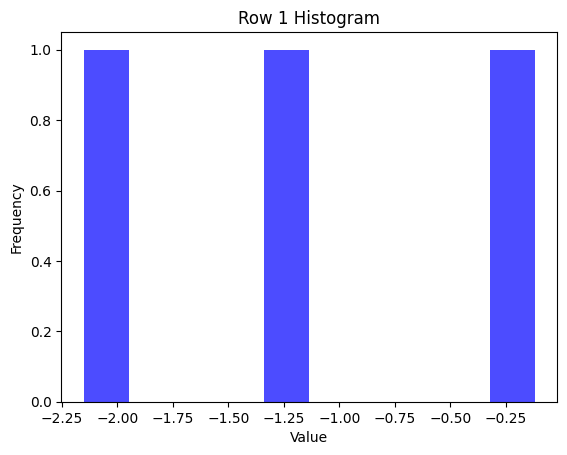

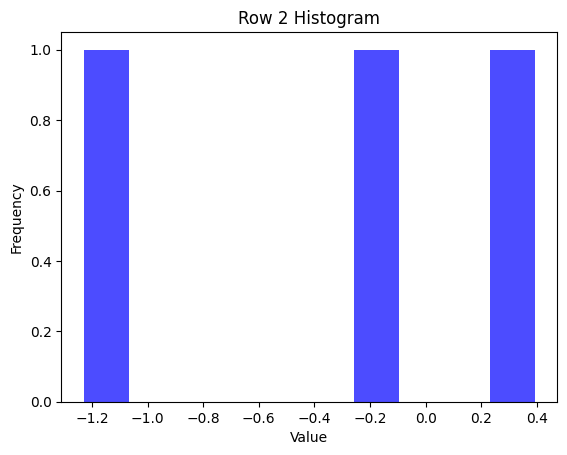

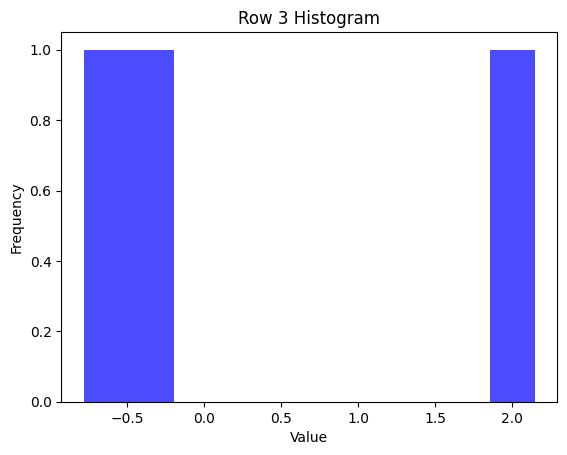

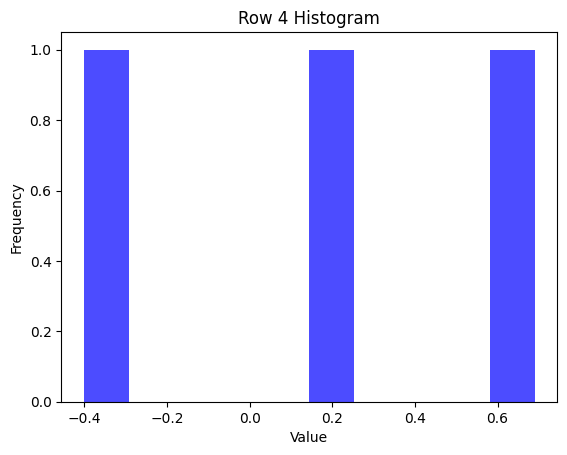

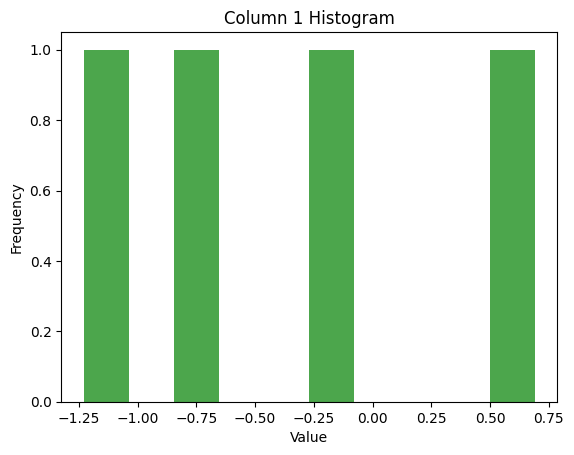

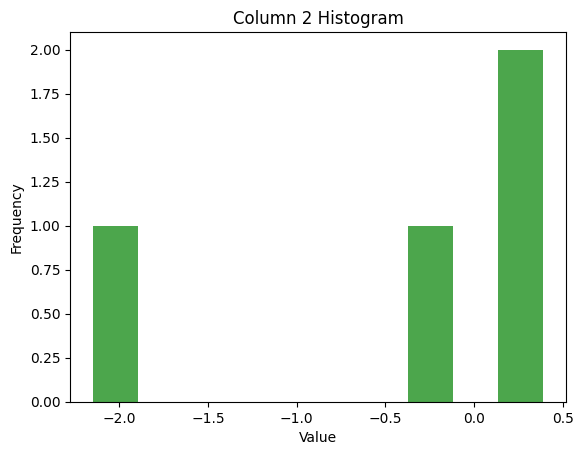

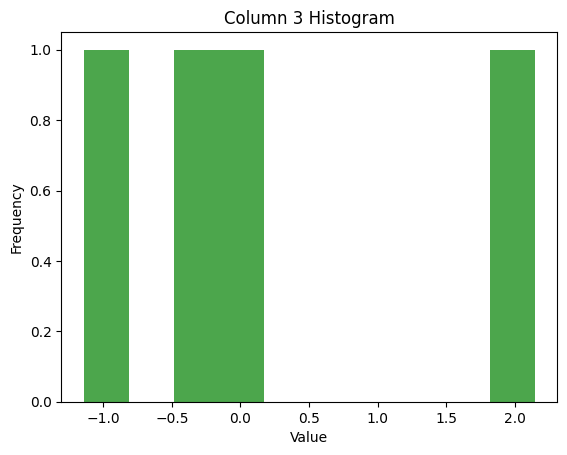

Row means: [-1.13724771 -0.32298695  0.38885706  0.1479223 ]
Row variances: [0.6871352  0.45631583 1.59919681 0.19855199]
Column means: [-0.3601431  -0.45015756  0.11770919]
Column variances: [0.5233369  1.00767483 1.50674562]


In [1]:
import unittest
import numpy as np
import matplotlib.pyplot as plt

def generate_matrix(m, n, mean=0, std=1):
    matrix = np.random.normal(mean, std, (m, n))
    
    #Мат ожидание, дисперсия (строки)
    row_means = matrix.mean(axis=1)
    row_vars = matrix.var(axis=1)
    
    #Мат ожидание, дисперсия (столбцы)
    col_means = matrix.mean(axis=0)
    col_vars = matrix.var(axis=0)
    
    # Гистограмма для строк
    for i in range(m):
        plt.figure()
        plt.hist(matrix[i, :], bins=10, alpha=0.7, color='blue')
        plt.title(f"Row {i+1} Histogram")
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.show()
    
    #Гистограмма для столбцов
    for j in range(n):
        plt.figure()
        plt.hist(matrix[:, j], bins=10, alpha=0.7, color='green')
        plt.title(f"Column {j+1} Histogram")
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.show()

    return {
        "row_means": row_means,
        "row_vars": row_vars,
        "col_means": col_means,
        "col_vars": col_vars
    }

result = generate_matrix(4, 3)  # 4 строки, 3 столбца

print("Row means:", result['row_means'])
print("Row variances:", result['row_vars'])
print("Column means:", result['col_means'])
print("Column variances:", result['col_vars'])


Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [1]:
import unittest
import numpy as np
import matplotlib.pyplot as plt

def chess(m, n, a, b):
    matrix = np.zeros((m, n), dtype=int)
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i, j] = a
            else:
                matrix[i, j] = b
    return matrix

class Tests_chess(unittest.TestCase):
    def test1(self):
        res = chess(2, 2, 1, 0)
        exp = np.array([
            [1, 0],
            [0, 1]
        ])
        np.testing.assert_array_equal(res, exp)

    def test2(self):
        res = chess(3, 3, 5, 10)
        exp = np.array([
            [5, 10, 5],
            [10, 5, 10],
            [5, 10, 5]
        ])
        np.testing.assert_array_equal(res, exp)

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

..
----------------------------------------------------------------------
Ran 2 tests in 0.005s

OK


Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

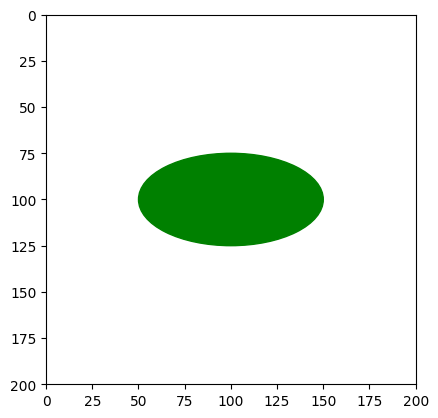

.

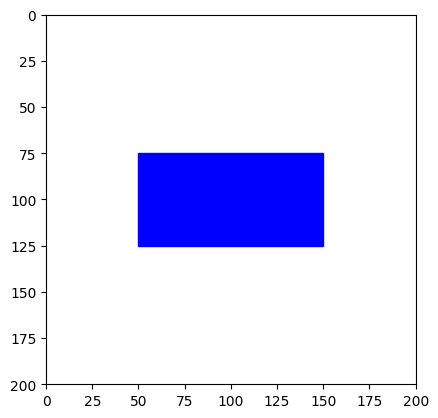

.
----------------------------------------------------------------------
Ran 2 tests in 0.153s

OK


In [1]:
import unittest
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Ellipse

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    fig, ax = plt.subplots()

    ax.set_xlim(0, m)
    ax.set_ylim(0, n)
    ax.set_facecolor(background_color)
    
    rect = Rectangle(((m - a) / 2, (n - b) / 2), a, b, color=rectangle_color)
    ax.add_patch(rect)
    
    ax.set_aspect('equal')
    plt.gca().invert_yaxis()
    plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    fig, ax = plt.subplots()
    ax.set_xlim(0, m)
    ax.set_ylim(0, n)
    ax.set_facecolor(background_color)
    
    ellipse = Ellipse((m / 2, n / 2), a, b, color=ellipse_color)
    ax.add_patch(ellipse)
    
    ax.set_aspect('equal')
    plt.gca().invert_yaxis()
    plt.show()


class TestDrawShapes(unittest.TestCase):
    def test_draw_rectangle(self):
        draw_rectangle(100, 50, 200, 200, 'blue', 'white')
    def test_draw_ellipse(self):
        draw_ellipse(100, 50, 200, 200, 'green', 'white')

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [6]:
import unittest
import numpy as np
import matplotlib.pyplot as plt

def analyze_time_series(series, p):
    res = {}
    
    # Математическое ожидание
    mean = np.mean(series)
    res['mean'] = mean
    
    # Дисперсия
    variance = np.var(series)
    res['variance'] = variance
    
    # СКО
    std_dev = np.std(series)
    res['std_dev'] = std_dev
    
    local_maxima = []
    local_minima = []
    
    for i in range(1, len(series) - 1):
        if series[i] > series[i - 1] and series[i] > series[i + 1]:
            local_maxima.append(i)
        if series[i] < series[i - 1] and series[i] < series[i + 1]:
            local_minima.append(i)
    
    res['local_maxima'] = local_maxima
    res['local_minima'] = local_minima
    
    # Скользящее среднее
    moving_avg = np.convolve(series, np.ones(p)/p, mode='valid')
    res['moving_avg'] = moving_avg
    
    return res

class Test_analyze_time_series(unittest.TestCase):
    def test1(self):
        series = np.array([1, 3, 7, 1, 2, 6, 0, 1, 4, 1])
        p = 3
        
        results = analyze_time_series(series, p)
        
        # Проверка математического ожидания
        self.assertAlmostEqual(results['mean'], np.mean(series))
        
        # Проверка дисперсии
        self.assertAlmostEqual(results['variance'], np.var(series))
        
        # Проверка СКО
        self.assertAlmostEqual(results['std_dev'], np.std(series))
        
        # Проверка локальных максимумов и минимумов
        self.assertEqual(results['local_maxima'], [2, 5, 8])
        self.assertEqual(results['local_minima'], [3, 6])
        
        # Проверка скользящего среднего
        expected_moving_avg = np.convolve(series, np.ones(p)/p, mode='valid')
        np.testing.assert_array_almost_equal(results['moving_avg'], expected_moving_avg)

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.
----------------------------------------------------------------------
Ran 1 test in 0.008s

OK


 Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [1]:
import unittest
import numpy as np
import matplotlib.pyplot as plt

def one_hot_encode(labels):
    num_classes = np.max(labels) + 1
    one_hot = np.zeros((labels.shape[0], num_classes), dtype=int)
    one_hot[np.arange(labels.shape[0]), labels] = 1
    return one_hot

class TestOneHotEncode(unittest.TestCase):
    def test_one_hot_encode(self):
        vector = np.array([0, 2, 3, 0])
        result = one_hot_encode(vector)
        expected = np.array([
            [1, 0, 0, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 1],
            [1, 0, 0, 0]
        ])
        np.testing.assert_array_equal(result, expected)

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.
----------------------------------------------------------------------
Ran 1 test in 0.004s

OK
